In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
dow_df = pd.read_csv('StocksDow.csv')
main_df = pd.read_csv('Merged_Data.csv')
main_df = main_df.loc[:,['Date','Sentiments','Stock Name','Ticker',
                        'Closing Price','Shares Traded', 'Normalized Value']]

In [3]:
dow_df = dow_df.append({'Symbol':'DJIA','Company':'Dow Jones Industrial Average'}, ignore_index=True)
print(dow_df.tail())
print(main_df.head(6))

   Symbol                       Company
26      V                      Visa Inc
27    WMT                   Walmart Inc
28    DIS                Walt Disney Co
29   DWDP                 DowDuPont Inc
30   DJIA  Dow Jones Industrial Average
       Date  Sentiments           Stock Name Ticker  Closing Price  \
0  4/6/2018   -0.000120  American Express Co    AXP          91.91   
1  4/5/2018    0.005188  American Express Co    AXP          94.20   
2  4/4/2018    0.067771  American Express Co    AXP          93.58   
3  4/3/2018    0.256584  American Express Co    AXP          92.74   
4  4/2/2018    0.092596  American Express Co    AXP          91.00   
5  4/1/2018    0.075388  American Express Co    NaN            NaN   

   Shares Traded  Normalized Value  
0      2968942.0         -0.242500  
1      2482315.0          0.473125  
2      4619167.0          0.279375  
3      2864528.0          0.016875  
4      4998386.0         -0.526875  
5            NaN               NaN  


In [8]:
# Creates Percent Change in Price column
main_df['Price (% Change)'] = (main_df['Closing Price']-main_df['Closing Price'].shift(1))/main_df['Closing Price'].shift(1)
print(main_df.head())

        Date  Sentiments           Stock Name Ticker  Closing Price  \
0   4/6/2018   -0.000120  American Express Co    AXP          91.91   
1   4/5/2018    0.005188  American Express Co    AXP          94.20   
2   4/4/2018    0.067771  American Express Co    AXP          93.58   
3   4/3/2018    0.256584  American Express Co    AXP          92.74   
4   4/2/2018    0.092596  American Express Co    AXP          91.00   
5   4/1/2018    0.075388  American Express Co    NaN            NaN   
6  3/31/2018    0.062831  American Express Co    NaN            NaN   

   Shares Traded  Normalized Value  Price (% Change)  
0      2968942.0         -0.242500               NaN  
1      2482315.0          0.473125          0.024916  
2      4619167.0          0.279375         -0.006582  
3      2864528.0          0.016875         -0.008976  
4      4998386.0         -0.526875         -0.018762  
5            NaN               NaN               NaN  
6            NaN               NaN            

In [9]:
# Calculate market index by averaging all information per day. *Shares Traded are summed.
djia_df = main_df.groupby('Date').mean()
total_shares = main_df.groupby('Date').sum()
djia_df['Shares Traded'] = total_shares['Shares Traded']
djia_df = djia_df.dropna(subset=['Closing Price']).reset_index()
print(djia_df)

       Date  Sentiments  Closing Price  Shares Traded  Normalized Value  \
0  4/2/2018    0.108891     116.272414    503692109.0         -0.468827   
1  4/3/2018    0.147650     118.177241    387359849.0         -0.050992   
2  4/4/2018    0.130451     119.321034    380698846.0          0.247354   
3  4/5/2018    0.104499     120.467241    345163023.0          0.469927   
4  4/6/2018    0.126192     117.660000    387922455.0         -0.197462   

   Price (% Change)  
0         -0.015144  
1         -0.010286  
2         -0.007973  
3          0.022607  
4               NaN  


In [10]:
# Add Ticker column and DJIA to all entries.
djia_df['Ticker'] = "DJIA"
djia_df['Stock Name'] = "Dow Jones Industrial Average"

In [11]:
# Append djia_df rows to main_df.
main_df = main_df.append(djia_df)
main_df.tail()

,Closing Price,Date,Normalized Value,Price (% Change),Sentiments,Shares Traded,Stock Name,Ticker
0,116.272414,4/2/2018,-0.468827,-0.015144,0.108891,503692109.0,Dow Jones Industrial Average,DJIA
1,118.177241,4/3/2018,-0.050992,-0.010286,0.147650,387359849.0,Dow Jones Industrial Average,DJIA
2,119.321034,4/4/2018,0.247354,-0.007973,0.130451,380698846.0,Dow Jones Industrial Average,DJIA
3,120.467241,4/5/2018,0.469927,0.022607,0.104499,345163023.0,Dow Jones Industrial Average,DJIA
4,117.660000,4/6/2018,-0.197462,NaN,0.126192,387922455.0,Dow Jones Industrial Average,DJIA


In [12]:
# Creates a dictionary to house a separate dataframe for each stock
d = {}
for row in main_df:
    for stock in dow_df['Symbol']:
        d[str(stock)] = main_df.loc[main_df['Ticker'] == stock]
print(d['DJIA'])

   Closing Price      Date  Normalized Value  Price (% Change)  Sentiments  \
0     116.272414  4/2/2018         -0.468827         -0.015144    0.108891   
1     118.177241  4/3/2018         -0.050992         -0.010286    0.147650   
2     119.321034  4/4/2018          0.247354         -0.007973    0.130451   
3     120.467241  4/5/2018          0.469927          0.022607    0.104499   
4     117.660000  4/6/2018         -0.197462               NaN    0.126192   

   Shares Traded                    Stock Name Ticker  
0    503692109.0  Dow Jones Industrial Average   DJIA  
1    387359849.0  Dow Jones Industrial Average   DJIA  
2    380698846.0  Dow Jones Industrial Average   DJIA  
3    345163023.0  Dow Jones Industrial Average   DJIA  
4    387922455.0  Dow Jones Industrial Average   DJIA  


In [ ]:
# Creates separate Sentiment plot for every stock
for stock in dow_df["Symbol"]:
    fontsize=30
    d[stock].plot(kind='scatter', x=main_df['Date'],
                       y=main_df['Sentiments'], grid=True,
                       figsize=(20,10),
                        fontsize=fontsize)
    plt.title('Sentiments vs Time: ' + stock, fontsize=fontsize)
    plt.xlabel('Dates', fontsize=fontsize)
    plt.ylabel('Sentiment Score', fontsize=fontsize)

In [ ]:
# Creates separate Price plot for every stock
for stock in stock_name_list:
    d[stock].plot(kind='scatter', x='Date',
                       y='Price', grid=True,
                       figsize=(20,10),
                        fontsize=fontsize)
    plt.title('Price vs Time: ' + stock, fontsize=fontsize)
    plt.xlabel('Dates', fontsize=fontsize)
    plt.ylabel('Price', fontsize=fontsize)

In [ ]:
# Creates separate Volume plot for every stock
for stock in stock_name_list:
    d[stock].plot(kind='scatter', x='Date',
                       y='Price', grid=True,
                       figsize=(20,10),
                        fontsize=fontsize)
    plt.title('Volume vs Time: ' + stock, fontsize=fontsize)
    plt.xlabel('Dates', fontsize=fontsize)
    plt.ylabel('Volume', fontsize=fontsize)

Input ticker symbol of desired stock: DJIA


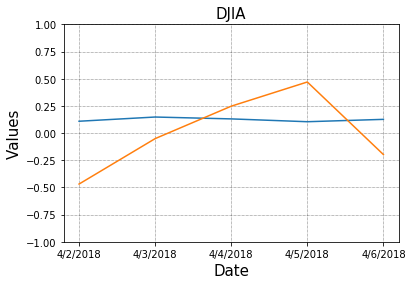

In [13]:
# Plots specific stock at user request
# Ask user for specific stock
stock_requested = input("Input ticker symbol of desired stock: ")

#Create plot of Normalized Price and Sentiment based on user input
fontsize=15
plt.ylim(-1,1)
plt.title(stock_requested, fontsize=fontsize)
plt.xlabel('Date', fontsize=fontsize)
plt.ylabel('Values', fontsize=fontsize)
plt.grid(color='k', linestyle=':', linewidth=.5)
plt.plot(d[stock_requested]['Date'],
            d[stock_requested]['Sentiments'])
plt.plot(d[stock_requested]['Date'],
            d[stock_requested]['Normalized Value'])
plt.show()


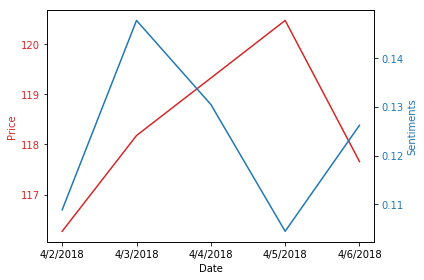

In [14]:
# Creates one plot with 2 different y-axis 
x = d[stock_requested]['Date'] # Dates
price = d[stock_requested]['Closing Price'] # Price
sentiment = d[stock_requested]['Sentiments'] # Sentiment

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(x, price, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sentiments', color=color)
ax2.plot(x, sentiment, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # keeps right label from clipping
plt.show()

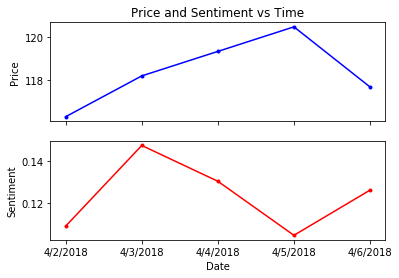

In [15]:
# Creates 2 subplots with Price and Sentiment
x = d[stock_requested]['Date'] # Dates
price = d[stock_requested]['Closing Price'] # Price
sentiment = d[stock_requested]['Sentiments'] # Sentiment

fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(x, price, 'b.-')
ax1.set(title='Price and Sentiment vs Time', ylabel='Price')

ax2.plot(x, sentiment, 'r.-')
ax2.set(xlabel='Date', ylabel='Sentiment')

plt.show()

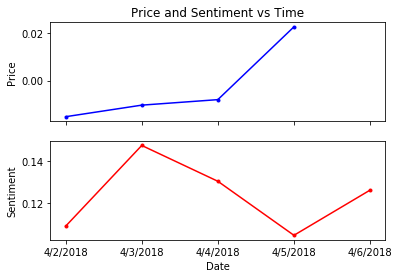

In [16]:
# Create two subplots with Price % Change and Sentiment
x = d[stock_requested]['Date'] # Dates
price = d[stock_requested]['Price (% Change)'] # Price
sentiment = d[stock_requested]['Sentiments'] # Sentiment

fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(x, price, 'b.-')
ax1.set(title='Price and Sentiment vs Time', ylabel='Price')

ax2.plot(x, sentiment, 'r.-')
ax2.set(xlabel='Date', ylabel='Sentiment')

plt.show()

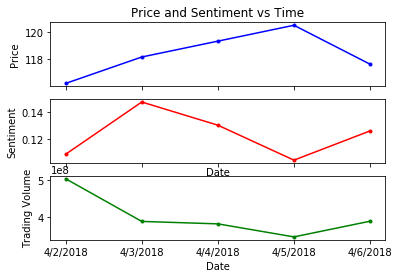

In [17]:
# Creates 3 subplots with Price, Sentiment, and Trading Volume
x = d[stock_requested]['Date'] # Dates
price = d[stock_requested]['Closing Price'] # Price
sentiment = d[stock_requested]['Sentiments'] # Sentiment
trade_volume = d[stock_requested]['Shares Traded']

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.plot(x, price, 'b.-')
ax1.set(title='Price and Sentiment vs Time', ylabel='Price')

ax2.plot(x, sentiment, 'r.-')
ax2.set(xlabel='Date', ylabel='Sentiment')

ax3.plot(x, trade_volume, 'g.-')
ax3.set(xlabel='Date', ylabel='Trading Volume')

plt.show()